In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import swifter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fidha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fidha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fidha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
df=pd.read_csv(r'C:\Users\fidha\Documents\Data_Science_Luminar\MAIN_PROJECTS\NLP\EMOTION_DETECTION\emotion_sentimen_dataset.csv')

In [54]:
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [55]:
df.tail()

,Unnamed: 0,text,Emotion
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral
839554,839554,i think that after i had spent some time inves...,neutral


In [56]:
df.columns

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

In [57]:
df.shape

(839555, 3)

In [58]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [59]:
df.columns

Index(['text', 'Emotion'], dtype='object')

Data Cleaning

In [60]:
df.isna().sum()

text       0
Emotion    0
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(445733)

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.shape

(393822, 2)

In [64]:
df['Emotion'].value_counts()

Emotion
neutral       316935
love           17634
happiness      13038
sadness         8485
relief          8007
hate            6160
anger           5952
fun             4854
enthusiasm      4497
surprise        3430
empty           2697
worry           2072
boredom           61
Name: count, dtype: int64

Sampling

In [65]:
df=df.sample(20000,random_state=42)

In [66]:
df['Emotion'].value_counts()

Emotion
neutral       16015
love            948
happiness       657
relief          407
sadness         403
hate            332
anger           300
enthusiasm      258
fun             233
surprise        182
empty           152
worry           111
boredom           2
Name: count, dtype: int64

Encoding

In [67]:
le=LabelEncoder()
df['Emotion']=le.fit_transform(df['Emotion'])

In [68]:
df['Emotion']

63994     8
180138    8
403699    8
235962    9
349093    8
         ..
207792    9
415576    8
350011    3
399738    8
86908     8
Name: Emotion, Length: 20000, dtype: int64

In [69]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12])

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [70]:
df

,text,Emotion
63994,i feel so weird when im in town,8
180138,i should get rid of it wow really feeling thre...,8
403699,i set about getting myself together to do the ...,8
235962,i do not mean to insult or offend anyone so if...,9
349093,i feel a bit disheartened reading the nanowrim...,8
...,...,...
207792,i really want to say is how very pleased i am ...,9
415576,i have this feeling of having resolved a tiny ...,8
350011,i got all excited about the feel and flow of a...,3
399738,i feel very horny,8


In [71]:
df.reset_index(drop=True,inplace=True)

Text Preprocessing

In [72]:
stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    sentence = sentence.lower()
    sentence = ''.join([char for char in sentence if char not in string.punctuation])
    tokens = sentence.split()
    tokens_without_stop = [word for word in tokens if word not in stop]
    lemmatized_data = [lemmatizer.lemmatize(word, 'v') for word in tokens_without_stop]
    return ' '.join(lemmatized_data)

In [73]:
!pip install swifter

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
x= df['text'].swifter.apply(preprocess)
y= df['Emotion']

Pandas Apply: 100%|██████████| 20000/20000 [00:01<00:00, 14907.51it/s]


Vectorization

In [75]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_vector = vectorizer.fit_transform(df['text'])

In [76]:
x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 148025 stored elements and shape (20000, 5000)>

Train-Test splitting

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x_vector,y,test_size=0.3,random_state=42)

In [78]:
print(x_vector.shape)

(20000, 5000)


Model Training

SVC()
--------------------
94.33333333333334
[[  62    0    0    0    0    0    0   39    0    0    0    0]
 [   0    1    0    0    0    2    2   43    2    1    0    0]
 [   0    0   57    0    0    0    0    6    0    0    0    0]
 [   0    0    0   45    0    0    0   23    0    0    0    0]
 [   0    0    0    0  158    0    0   42    1    0    0    0]
 [   0    0    0    0    0   58    0   27    1    0    0    0]
 [   1    0    0    1    1    2  240   24    0    0    0    0]
 [   0    3    0    0    0    0    0 4818    1    0    0    0]
 [   0    0    0    0    0    0    0   54   68    0    0    0]
 [   0    0    1    0    2    0    1   20    0   96    1    0]
 [   0    0    0    0    1    0    2   12    0    0   44    0]
 [   0    0    0    0    1    0    0   23    0    0    0   13]]
              precision    recall  f1-score   support

           0       0.98      0.61      0.76       101
           2       0.25      0.02      0.04        51
           3       0.98      0.90  

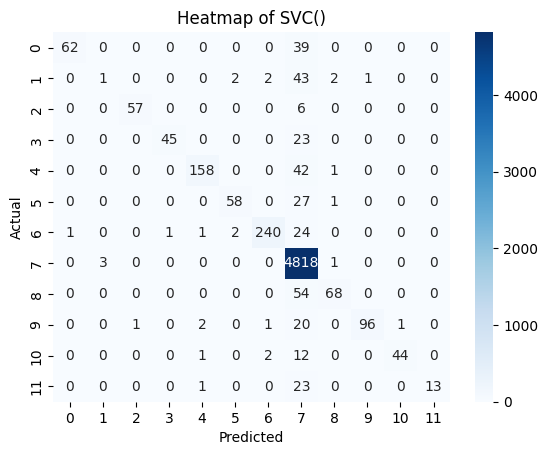

MultinomialNB()
--------------------
80.96666666666667
[[   0    0    0    0    0    0    0  101    0    0    0    0]
 [   0    0    0    0    0    0    0   51    0    0    0    0]
 [   0    0    1    0    0    0    0   62    0    0    0    0]
 [   0    0    0    0    0    0    0   68    0    0    0    0]
 [   0    0    0    0    7    0    0  194    0    0    0    0]
 [   0    0    0    0    0    1    0   85    0    0    0    0]
 [   0    0    0    0    0    0   23  246    0    0    0    0]
 [   0    0    0    0    0    0    0 4822    0    0    0    0]
 [   0    0    0    0    0    0    0  120    2    0    0    0]
 [   0    0    0    0    1    0    0  118    0    2    0    0]
 [   0    0    0    0    0    0    0   59    0    0    0    0]
 [   0    0    0    0    0    0    0   37    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        51
           3       1.00  

c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

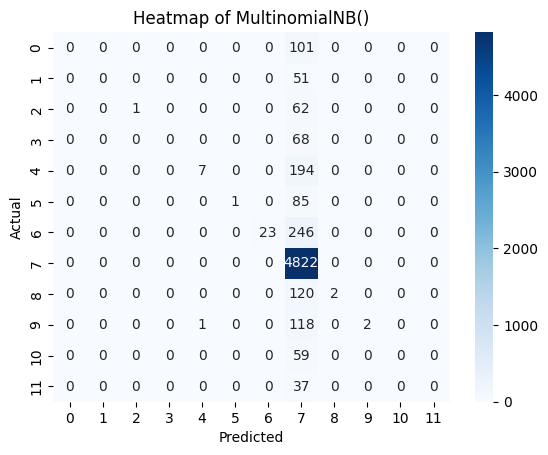

RandomForestClassifier()
--------------------
97.86666666666667
[[  91    0    0    0    0    0    0   10    0    0    0    0]
 [   0   14    0    0    0    3    3   28    2    1    0    0]
 [   0    0   61    0    0    0    0    2    0    0    0    0]
 [   0    0    0   59    0    0    0    8    1    0    0    0]
 [   0    0    0    0  194    0    0    5    2    0    0    0]
 [   2    0    0    0    0   67    0   16    1    0    0    0]
 [   1    0    0    0    3    1  264    0    0    0    0    0]
 [   0    4    0    0    1    0    0 4816    1    0    0    0]
 [   0    0    0    0    0    0    0   18  104    0    0    0]
 [   0    0    1    0    1    0    1    3    0  114    1    0]
 [   1    0    0    0    1    0    0    1    0    0   56    0]
 [   0    0    0    0    4    0    0    0    1    0    0   32]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       101
           2       0.78      0.27      0.41        51
           3    

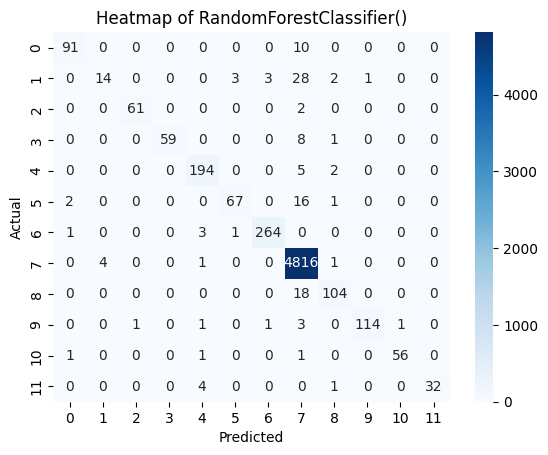

LogisticRegression()
--------------------
90.96666666666667
[[  43    0    0    0    0    0    0   58    0    0    0    0]
 [   0    0    0    0    0    2    2   44    2    1    0    0]
 [   0    0   44    0    0    0    0   19    0    0    0    0]
 [   0    0    0   29    0    0    0   39    0    0    0    0]
 [   0    0    0    0  114    0    0   86    1    0    0    0]
 [   0    0    0    0    0   48    0   37    1    0    0    0]
 [   1    0    0    0    1    2  205   60    0    0    0    0]
 [   0    0    0    0    0    0    0 4821    1    0    0    0]
 [   0    0    0    0    0    0    0   73   49    0    0    0]
 [   0    0    0    0    2    0    1   41    0   77    0    0]
 [   0    0    0    0    1    0    2   30    0    0   26    0]
 [   0    0    0    0    1    0    0   33    1    0    0    2]]
              precision    recall  f1-score   support

           0       0.98      0.43      0.59       101
           2       0.00      0.00      0.00        51
           3       1

c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

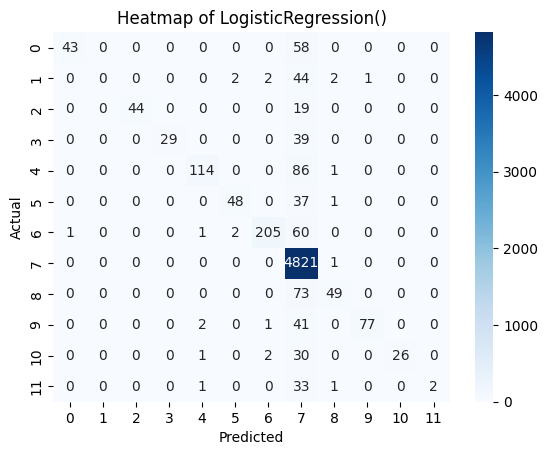

In [79]:
models=[SVC(),MultinomialNB(),RandomForestClassifier(),LogisticRegression()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model)
    print("--------------------")
    print(accuracy_score(y_test,y_pred)*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)
    plt.title(f'Heatmap of {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

SMOTE

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_vector,y,test_size=0.3,random_state=42)

In [81]:

smote = SMOTE(k_neighbors=1, random_state=42)
x_over_s, y_over_s = smote.fit_resample(x_train,y_train)

MultinomialNB()
--------------------
80.96666666666667
[[   0    0    0    0    0    0    0  101    0    0    0    0]
 [   0    0    0    0    0    0    0   51    0    0    0    0]
 [   0    0    1    0    0    0    0   62    0    0    0    0]
 [   0    0    0    0    0    0    0   68    0    0    0    0]
 [   0    0    0    0    7    0    0  194    0    0    0    0]
 [   0    0    0    0    0    1    0   85    0    0    0    0]
 [   0    0    0    0    0    0   23  246    0    0    0    0]
 [   0    0    0    0    0    0    0 4822    0    0    0    0]
 [   0    0    0    0    0    0    0  120    2    0    0    0]
 [   0    0    0    0    1    0    0  118    0    2    0    0]
 [   0    0    0    0    0    0    0   59    0    0    0    0]
 [   0    0    0    0    0    0    0   37    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        51
           3       1.00  

c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

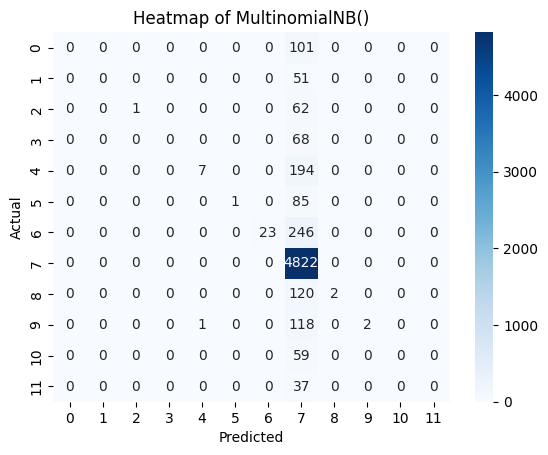

In [82]:
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print("--------------------")
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)
plt.title(f'Heatmap of {model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RandomForestClassifier()
--------------------
97.89999999999999
[[  93    0    0    0    0    0    0    8    0    0    0    0]
 [   0   14    0    0    0    2    3   28    2    1    0    1]
 [   0    0   61    0    0    0    0    2    0    0    0    0]
 [   0    0    0   59    0    0    0    8    1    0    0    0]
 [   0    0    0    0  195    0    0    4    2    0    0    0]
 [   2    0    0    0    1   66    0   16    1    0    0    0]
 [   1    0    0    1    1    1  265    0    0    0    0    0]
 [   0    4    0    0    1    0    0 4816    1    0    0    0]
 [   0    0    0    0    0    0    0   18  104    0    0    0]
 [   0    0    0    0    2    0    1    3    1  113    1    0]
 [   1    0    0    0    1    0    1    1    0    0   55    0]
 [   0    0    0    0    3    0    0    0    1    0    0   33]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       101
           2       0.78      0.27      0.41        51
           3    

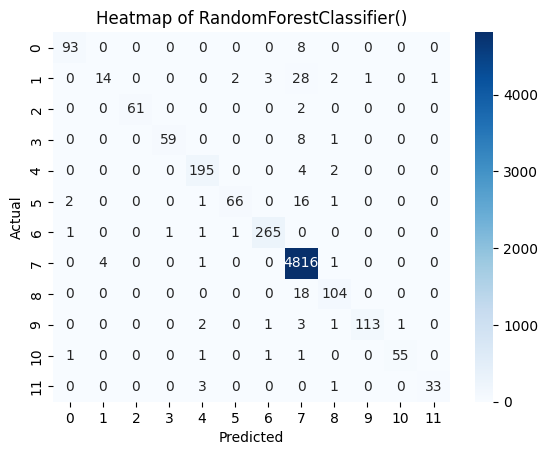

In [83]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print("--------------------")
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)
plt.title(f'Heatmap of {model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LogisticRegression()
--------------------
90.96666666666667
[[  43    0    0    0    0    0    0   58    0    0    0    0]
 [   0    0    0    0    0    2    2   44    2    1    0    0]
 [   0    0   44    0    0    0    0   19    0    0    0    0]
 [   0    0    0   29    0    0    0   39    0    0    0    0]
 [   0    0    0    0  114    0    0   86    1    0    0    0]
 [   0    0    0    0    0   48    0   37    1    0    0    0]
 [   1    0    0    0    1    2  205   60    0    0    0    0]
 [   0    0    0    0    0    0    0 4821    1    0    0    0]
 [   0    0    0    0    0    0    0   73   49    0    0    0]
 [   0    0    0    0    2    0    1   41    0   77    0    0]
 [   0    0    0    0    1    0    2   30    0    0   26    0]
 [   0    0    0    0    1    0    0   33    1    0    0    2]]
              precision    recall  f1-score   support

           0       0.98      0.43      0.59       101
           2       0.00      0.00      0.00        51
           3       1

c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

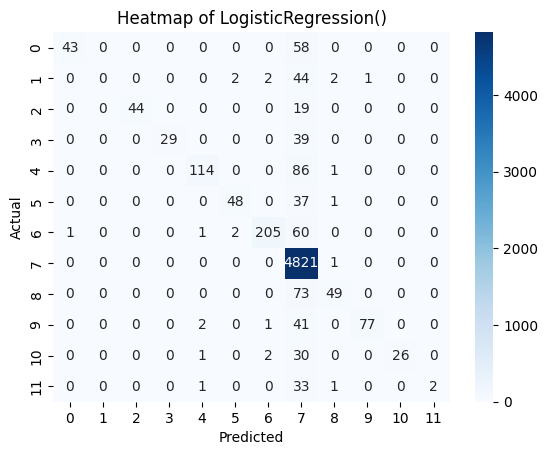

In [84]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print("--------------------")
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)
plt.title(f'Heatmap of {model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVC()
--------------------
94.33333333333334
[[  62    0    0    0    0    0    0   39    0    0    0    0]
 [   0    1    0    0    0    2    2   43    2    1    0    0]
 [   0    0   57    0    0    0    0    6    0    0    0    0]
 [   0    0    0   45    0    0    0   23    0    0    0    0]
 [   0    0    0    0  158    0    0   42    1    0    0    0]
 [   0    0    0    0    0   58    0   27    1    0    0    0]
 [   1    0    0    1    1    2  240   24    0    0    0    0]
 [   0    3    0    0    0    0    0 4818    1    0    0    0]
 [   0    0    0    0    0    0    0   54   68    0    0    0]
 [   0    0    1    0    2    0    1   20    0   96    1    0]
 [   0    0    0    0    1    0    2   12    0    0   44    0]
 [   0    0    0    0    1    0    0   23    0    0    0   13]]
              precision    recall  f1-score   support

           0       0.98      0.61      0.76       101
           2       0.25      0.02      0.04        51
           3       0.98      0.90  

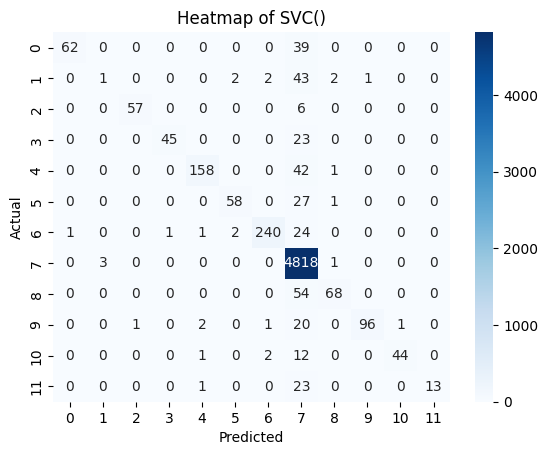

In [85]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print("--------------------")
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)
plt.title(f'Heatmap of {model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [86]:
y_over_s.value_counts()

Emotion
8     11193
5     11193
7     11193
3     11193
12    11193
10    11193
6     11193
9     11193
11    11193
4     11193
0     11193
2     11193
1     11193
Name: count, dtype: int64

In [87]:
final_model=RandomForestClassifier()
final_model.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12])

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [89]:
df[df['Emotion'] == 1]['text'].iloc[0]

'i still feel a dull monotony of life working on that day and night'

In [129]:
df[df['Emotion'] == 9]['text'].iloc[26]

'i have seen that a father or some person in the family generates so much negative vibes in his home that the other members of the family feel uncomfortable when he is home'

In [134]:
df[df['Emotion'] == 5]['text'].iloc[4]

'im feeling far more contented'

In [102]:
df[df['Emotion'] == 4]['text'].iloc[11]

'i am not feeling very joyful today its been a rough day'

In [91]:
dict={'vectorizer':vectorizer,'label':le,'model':final_model}

In [94]:
import pickle
with open('emotions.pkl','wb') as obj1:
  pickle.dump(dict,obj1)